In [9]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def load_images_from_path(path, label):
    images, labels = [], []
    
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
    return images, labels

In [12]:
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
    subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [14]:
x_train, y_train, x_test, y_test = [], [], [], []

Train Data

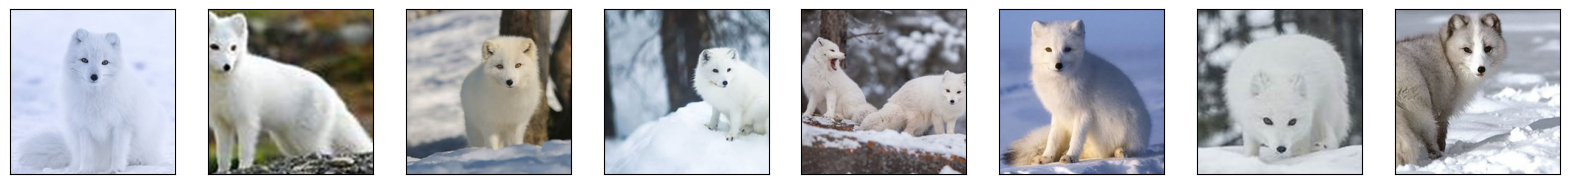

In [15]:
images, labels = load_images_from_path('arctic-wildlife/train/arctic_fox', 0)
show_images(images)
x_train += images
y_train += labels

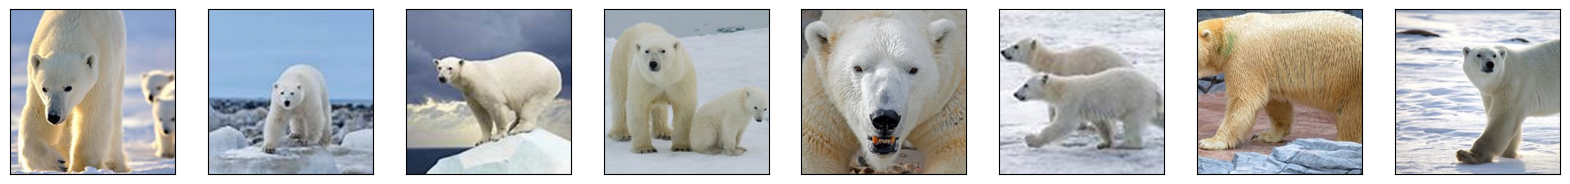

In [16]:
images, labels = load_images_from_path('arctic-wildlife/train/polar_bear', 1)
show_images(images)
x_train += images
y_train += labels


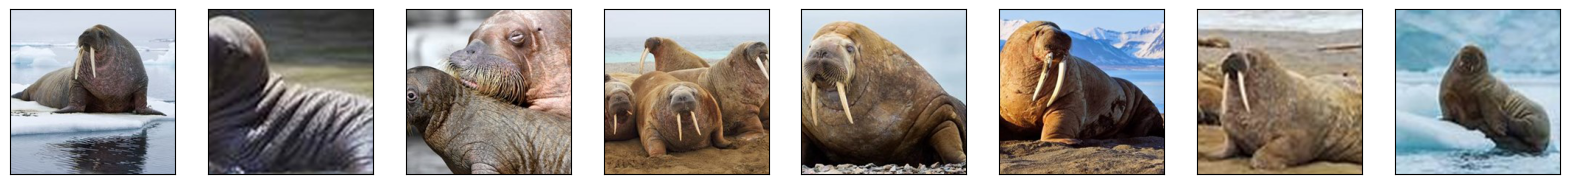

In [17]:
images, labels = load_images_from_path('arctic-wildlife/train/walrus', 2)
show_images(images)
x_train += images
y_train += labels

Test Data

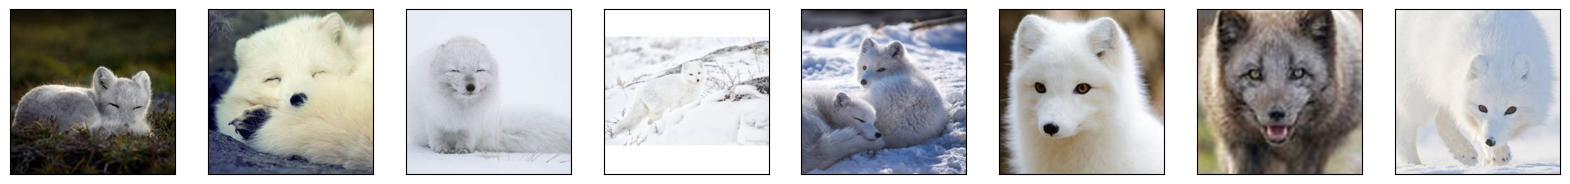

In [18]:
images, labels = load_images_from_path('arctic-wildlife/test/arctic_fox', 0)
show_images(images)
x_test += images
y_test += labels

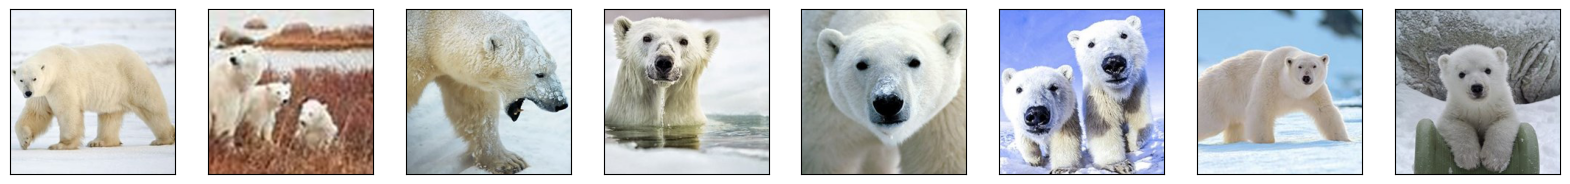

In [19]:
images, labels = load_images_from_path('arctic-wildlife/test/polar_bear', 1)
show_images(images)
x_test += images
y_test += labels

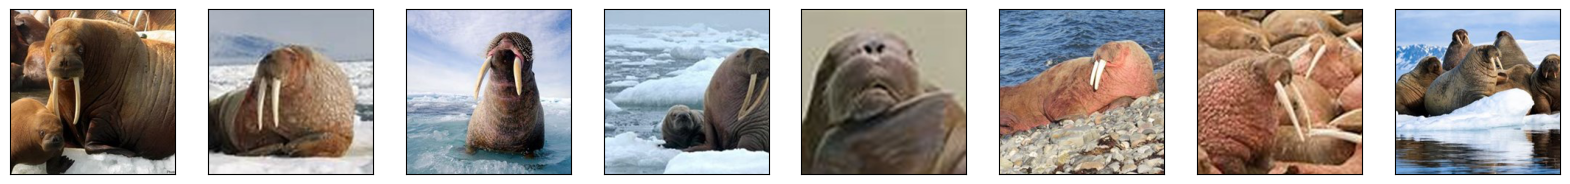

In [20]:
images, labels = load_images_from_path('arctic-wildlife/test/walrus', 2)
show_images(images)
x_test += images
y_test += labels


In [21]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
x_train = preprocess_input(np.array(x_train)) / 255
x_test = preprocess_input(np.array(x_test)) / 255
y_train = np.array(y_train)
y_test = np.array(y_test)


In [22]:
from tensorflow.keras.applications import ResNet50V2


In [23]:
base_model = ResNet50V2(weights='imagenet', include_top=False)
x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

4/4 [==============================] - 10s 2s/step


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [26]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])


In [27]:
hist = model.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 batch_size=10, epochs=10)


Epoch 1/10
30/30 [==============================] - 53s 2s/step - loss: 8.6650 - accuracy: 0.8833 - val_loss: 5.0205 - val_accuracy: 0.9667
Epoch 2/10
30/30 [==============================] - 49s 2s/step - loss: 1.1270 - accuracy: 0.9867 - val_loss: 5.1339 - val_accuracy: 0.9500
Epoch 3/10
30/30 [==============================] - 46s 2s/step - loss: 0.3797 - accuracy: 0.9900 - val_loss: 3.9897 - val_accuracy: 0.9750
Epoch 4/10
30/30 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.2044 - val_accuracy: 0.9583
Epoch 5/10
30/30 [==============================] - 51s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.2369 - val_accuracy: 0.9583
Epoch 6/10
30/30 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.2384 - val_accuracy: 0.9583
Epoch 7/10
30/30 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.2385 - val_accuracy: 0.9583
Epoc

[]

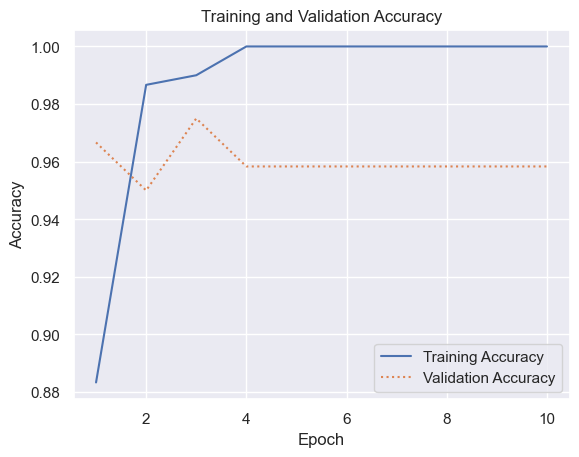

In [28]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


4/4 [==============================] - 1s 100ms/step


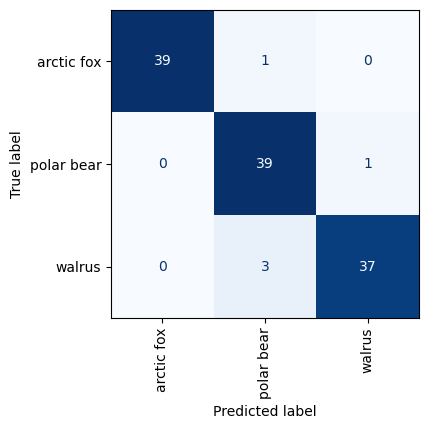

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
sns.reset_orig()
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(False)
y_pred = model.predict(x_test)
class_labels = ['arctic fox', 'polar bear', 'walrus']
cmd.from_predictions(y_test, y_pred.argmax(axis=1),
 display_labels=class_labels, colorbar=False,
 cmap='Blues', xticks_rotation='vertical', ax=ax)